# Kaggle Competition: House Prices: Advanced Regression Techniques

Competition Description:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques#description

## 1) Business Understanding

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## 2) Data Understanding

### 2.1 Import Libraries

In [72]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import scipy.stats as stats
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as pylab
#configure visualizations
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# # Modelling Helpers
# from sklearn.preprocessing import Imputer , Normalizer , scale
# from sklearn.cross_validation import train_test_split , StratifiedKFold
# from sklearn.feature_selection import RFECV

### 2.2 Load Data

In [73]:
train = pd.read_csv('train.csv')
# testM = pd.read_csv('test.csv')

In [74]:
train, test = train_test_split(train, train_size = 0.7)

### 2.3.1 Statistical Summaries

In [75]:
train.shape

(1021, 81)

In [76]:
test.shape

(439, 81)

In [77]:
print(train.columns.values)
# Classes?

#train.info()

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [78]:
# preview the data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
905,906,20,RL,80.0,9920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,HdBoard,HdBoard,Stone,110.0,TA,TA,CBlock,TA,TA,No,Rec,354,LwQ,290,412,1056,GasA,TA,Y,SBrkr,1063,0,0,1063,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1954.0,RFn,1,280,TA,TA,Y,0,0,164,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,128000
1319,1320,20,RL,75.0,10215,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1954,1954,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,132.0,TA,TA,PConc,TA,TA,No,ALQ,492,Unf,0,372,864,GasA,Ex,Y,SBrkr,948,0,0,948,0,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1954.0,Unf,1,248,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,111000
1223,1224,20,RL,89.0,10680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,3,1951,1951,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,44.0,TA,TA,CBlock,TA,Fa,No,LwQ,756,Unf,0,1380,2136,GasA,TA,N,FuseA,2136,0,0,2136,0,0,2,0,4,1,TA,7,Mod,0,NaN,Detchd,1951.0,Unf,2,528,TA,TA,Y,0,30,0,0,0,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,137900
366,367,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,Normal,159000
281,282,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,68.0,Gd,TA,PConc,Gd,TA,No,GLQ,905,Unf,0,357,1262,GasA,Gd,Y,SBrkr,1262,0,0,1262,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2006.0,Fin,2,572,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,5,2006,New,Partial,185000


In [79]:
pd.options.display.max_columns=100
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
594,595,20,RL,88.0,7990,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1975,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,924,924,GasA,TA,Y,SBrkr,924,0,0,924,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1981.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,WD,Normal,110000
328,329,75,RL,NaN,11888,Pave,Pave,IR1,Bnk,AllPub,Inside,Gtl,BrkSide,PosN,Norm,1Fam,2.5Unf,6,6,1916,1994,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,844,844,GasA,Gd,N,FuseA,1445,689,0,2134,0,0,2,0,5,1,Gd,10,Typ,0,NaN,Detchd,1930.0,Unf,2,441,TA,TA,Y,0,60,268,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,214500
1153,1154,30,RM,NaN,5890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,6,8,1930,2007,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Av,ALQ,538,Unf,0,278,816,GasA,Ex,Y,SBrkr,816,0,0,816,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,2002.0,Unf,1,432,TA,TA,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,120500
842,843,80,RL,82.0,9020,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Gable,CompShg,HdBoard,HdBoard,BrkFace,183.0,TA,TA,CBlock,TA,TA,Gd,Rec,312,ALQ,539,276,1127,GasA,TA,Y,SBrkr,1165,0,0,1165,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1966.0,RFn,2,490,Gd,Gd,Y,0,129,0,0,0,0,NaN,GdPrv,NaN,0,5,2008,WD,Normal,174900
1272,1273,20,RL,NaN,13526,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1965,1965,Hip,CompShg,HdBoard,Plywood,BrkFace,114.0,TA,TA,CBlock,TA,TA,No,BLQ,560,LwQ,375,0,935,GasA,TA,Y,SBrkr,935,0,0,935,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1965.0,Unf,1,288,TA,TA,Y,180,0,0,0,0,0,NaN,MnPrv,NaN,0,11,2006,WD,Normal,137000


In [80]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1021.000000,1021.000000,840.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1017.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,960.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,736.752204,56.758080,71.105952,10186.894221,6.070519,5.572968,1971.307542,1984.488737,103.732547,434.177277,47.905975,571.260529,1053.343781,1161.655240,335.036239,5.997062,1502.688541,0.407444,0.064643,1.563173,0.374143,2.859941,1.047992,6.503428,0.586680,1978.759375,1.768854,474.494613,93.697356,44.801175,21.643487,2.122429,15.176298,3.401567,43.790402,6.261508,2007.819785,179087.674829
std,417.664428,42.725976,24.809250,5864.950957,1.397800,1.136651,30.155275,20.945286,182.689437,464.761181,167.627397,451.693485,459.787470,396.874184,423.843492,49.480051,513.190599,0.507303,0.253860,0.552335,0.496139,0.814676,0.227192,1.587092,0.630576,24.584374,0.748495,217.835239,122.697578,65.550494,61.275913,19.838952,57.362147,44.791624,526.133726,2.702065,1.348507,76595.368588
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,377.000000,20.000000,60.000000,7599.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,223.000000,780.000000,866.000000,0.000000,0.000000,1120.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.750000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,758.000000,50.000000,70.000000,9453.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,368.000000,0.000000,476.000000,983.000000,1073.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,477.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162000.000000
75%,1091.000000,70.000000,80.000000,11600.000000,7.000000,6.000000,2001.000000,2004.000000,160.000000,690.000000,0.000000,813.000000,1291.000000,1405.000000,720.000000,0.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213250.000000
max,1459.000000,190.000000,313.000000,70761.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,1818.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,245.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,625000.000000


### 2.3.2 Visualizations

#### Look at outcome variable (SalePrice)

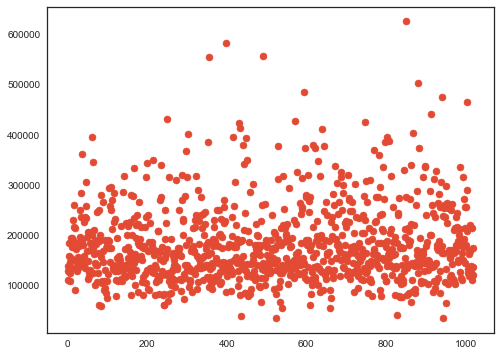

In [81]:
plt.scatter(range(0,len(train['SalePrice'])),train['SalePrice'])

(array([  70.,  383.,  306.,  148.,   65.,   28.,   13.,    4.,    2.,    2.]),
 array([  34900.,   93910.,  152920.,  211930.,  270940.,  329950.,
         388960.,  447970.,  506980.,  565990.,  625000.]),
 <a list of 10 Patch objects>)

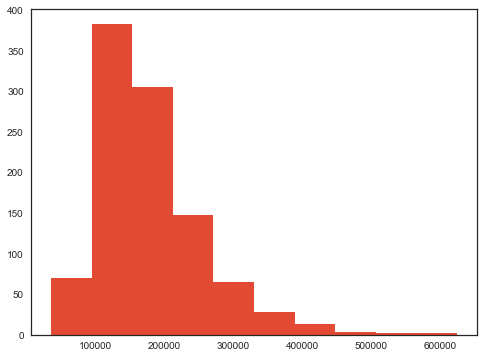

In [82]:
plt.hist(train['SalePrice'])

In [ ]:
sale_price_norm = np.log(train['SalePrice'])
plt.hist(sale_price_norm)

(array([   4.,    7.,   27.,  104.,  277.,  301.,  173.,   93.,   28.,    7.]),
 array([ 10.46024211,  10.74876859,  11.03729507,  11.32582155,
         11.61434804,  11.90287452,  12.191401  ,  12.47992748,
         12.76845396,  13.05698045,  13.34550693]),
 <a list of 10 Patch objects>)

34900


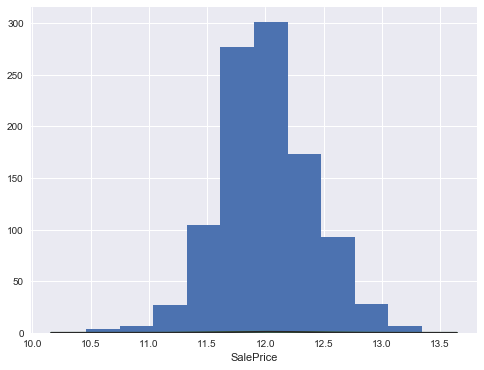

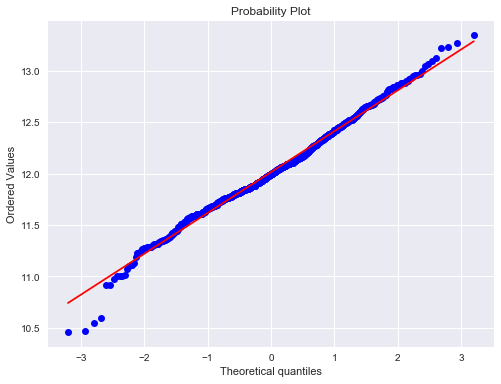

In [121]:
print(min(train['SalePrice']))

#sale_price_norm = np.log1p(train['SalePrice'])
#plt.hist(sale_price_norm)

from scipy.stats import norm
#applying log transformation
#train['SalePrice'] = np.log(df_train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(np.log(train['SalePrice']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(train['SalePrice']), plot=plt)

In [84]:
#Then we shall be getting the percentage of the missing values in columns of our dataset like below
percentage_missing = train.isnull().sum()/len(train)
percentage_missing = percentage_missing[percentage_missing > 0]
percentage_missing.sort_values(inplace=True)#we use inplace=True to make changes to our columns
print(percentage_missing)


#    # Handle remaining missing values for numerical features by using median as replacement
#    print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
#    train_num = train_num.fillna(train_num.median())
#    print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

Electrical      0.000979
MasVnrType      0.003918
MasVnrArea      0.003918
BsmtQual        0.027424
BsmtCond        0.027424
BsmtFinType1    0.027424
BsmtExposure    0.028404
BsmtFinType2    0.028404
GarageCond      0.059745
GarageQual      0.059745
GarageFinish    0.059745
GarageType      0.059745
GarageYrBlt     0.059745
LotFrontage     0.177277
FireplaceQu     0.487757
Fence           0.801175
Alley           0.946131
MiscFeature     0.965720
PoolQC          0.994123
dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

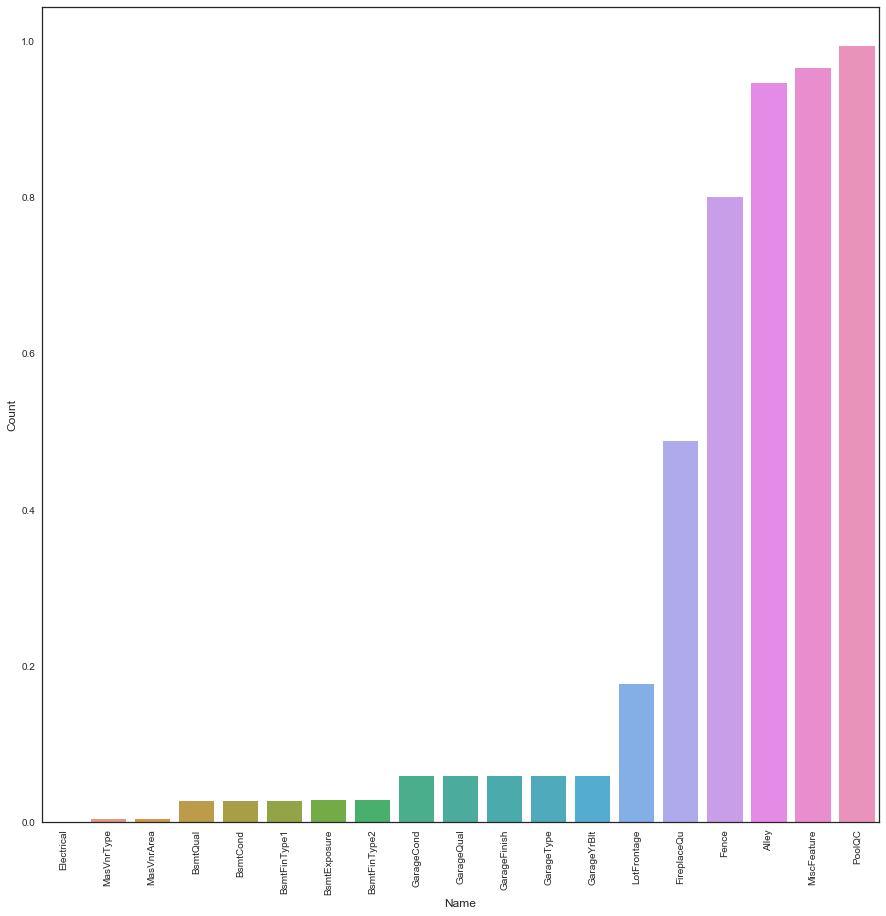

In [85]:
#lets plot to visualize the missing values
percentage_missing = percentage_missing.to_frame()
percentage_missing.columns=['Count']
percentage_missing.index.names = ['Name']
percentage_missing['Name'] = percentage_missing.index
plt.figure(figsize=(15,15))
sns.barplot(x="Name",y="Count",data=percentage_missing)
plt.xticks(rotation=90)

#missing = train.isnull().sum()
#missing = missing[missing > 0]
#missing.sort_values(inplace=True)
#missing.plot.bar()

In [95]:
# Look at the variables with high numbers of missings
for i in list(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']):
    cat_pivot = train.pivot_table(index=i,values="SalePrice",aggfunc=np.median)
    print (cat_pivot)

        SalePrice
PoolQC           
Ex         235000
Fa         215500
Gd         171000
             SalePrice
MiscFeature           
Gar2            151500
Othr             94000
Shed            140000
TenC            250000
       SalePrice
Alley           
Grvl      116500
Pave      172500
       SalePrice
Fence           
GdPrv     162000
GdWo      139500
MnPrv     134450
MnWw      145000
             SalePrice
FireplaceQu           
Ex              305250
Fa              157500
Gd              214950
Po              139000
TA              185000


We can probably assume that the missings for PoolQC, Alley, Fence, and FireplaceQu correspond with those features being absent in a house.

#### Analyzing different variable types

In [15]:
numVars = list(train.describe().columns)
print(numVars)
#quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
#quantitative.remove('SalePrice')
#quantitative.remove('Id')
#OR
#numerical_data = train.select_dtypes(include=[np.number])
#categorical_data = train.select_dtypes(exclude=[np.number])
#len(quantitative)
print(len(numVars))
numVars.remove('SalePrice')
numVars.remove('Id')
print(len(numVars))
numData = train[numVars]

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
38
36


In [16]:
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
print(qualitative)
print(len(qualitative))
catData = train[qualitative]

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
43


Initial efforts will focus on examining what factors may contribute to graduation rates. Graduate rates help determine whether schools are designated as Title I schools, and thus receive significant funding for special programs to aid students and teachers. 

#### Numeric Data

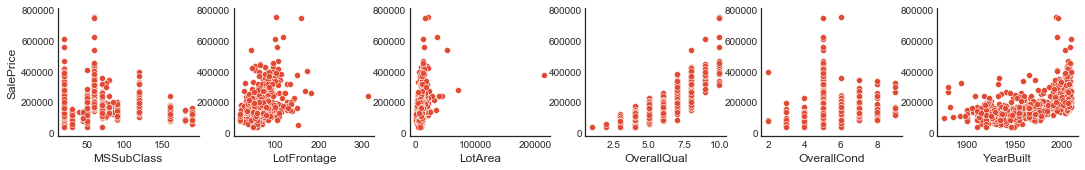

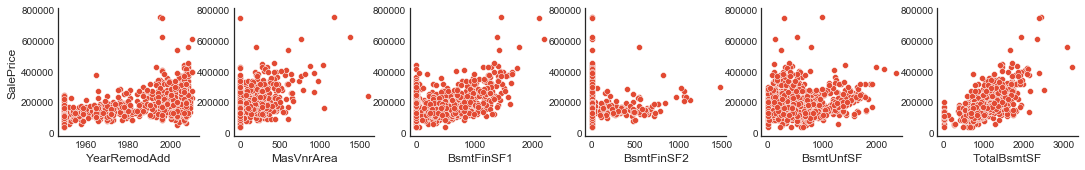

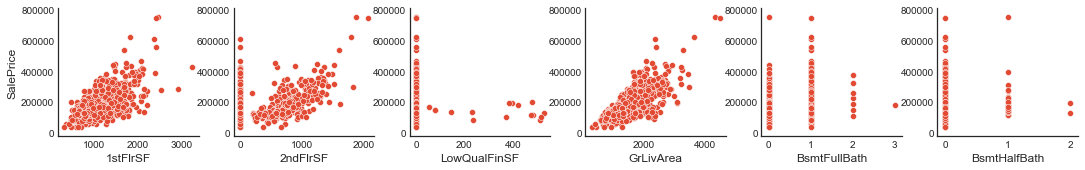

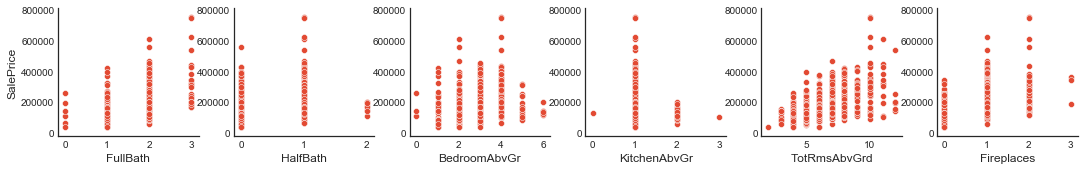

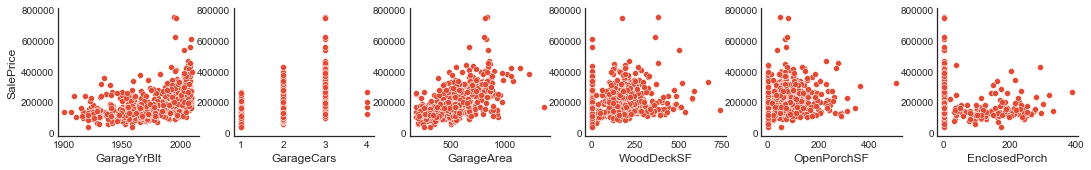

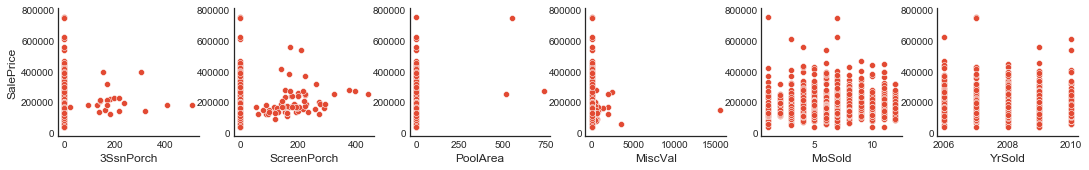

In [17]:
sns.pairplot(train[numVars[0:6] + list(["SalePrice"])].dropna(), x_vars=numVars[0:6], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[6:12] + list(["SalePrice"])].dropna(), x_vars=numVars[6:12], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[12:18] + list(["SalePrice"])].dropna(), x_vars=numVars[12:18], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[18:24] + list(["SalePrice"])].dropna(), x_vars=numVars[18:24], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[24:30] + list(["SalePrice"])].dropna(), x_vars=numVars[24:30], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[30:36] + list(["SalePrice"])].dropna(), x_vars=numVars[30:36], y_vars='SalePrice', size=2.5, diag_kind="kde")

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.382718,-0.172019,0.039778,-0.067892,0.055855,0.031783,0.011910,-0.041055,-0.062184,-0.147114,-0.225685,-0.247628,0.262065,0.027881,0.048319,0.040759,0.004631,0.112839,0.151051,-0.044740,0.254024,-0.002579,-0.038147,0.096123,-0.032293,-0.086712,-0.044170,-0.000658,-0.026313,-0.047042,-0.010762,0.013169,-0.018989,-0.007072,-0.041353,-0.080235
LotFrontage,-0.382718,1.000000,0.383957,0.209413,-0.051799,0.082993,0.053684,0.172496,0.169358,0.042313,0.100613,0.297311,0.408549,0.078862,0.040102,0.361466,0.101281,-0.025926,0.187462,0.061998,0.298573,0.025999,0.346749,0.238830,0.024160,0.276069,0.291429,0.084638,0.097332,0.008097,0.086591,0.023040,0.105621,0.006500,0.040681,0.033361,0.364485
LotArea,-0.172019,0.383957,1.000000,0.096318,0.008158,-0.003903,0.003877,0.092628,0.152717,0.146243,-0.006758,0.211757,0.258242,0.059542,-0.003230,0.235963,0.127877,0.059379,0.111900,0.009948,0.141623,-0.021524,0.186056,0.254747,-0.049344,0.151381,0.150432,0.088131,0.046201,-0.028791,0.020405,0.048434,0.040823,0.020923,-0.002049,0.013338,0.277291
OverallQual,0.039778,0.209413,0.096318,1.000000,-0.091242,0.587397,0.541007,0.410738,0.228616,-0.059847,0.305548,0.542432,0.469629,0.306098,-0.072899,0.591829,0.108047,-0.047493,0.560553,0.278251,0.145237,-0.178779,0.442020,0.382434,0.565347,0.605657,0.561347,0.211699,0.290953,-0.101628,0.034156,0.063408,0.055390,-0.026697,0.060326,-0.023465,0.792814
OverallCond,-0.067892,-0.051799,0.008158,-0.091242,1.000000,-0.387437,0.067663,-0.132849,-0.043659,0.060048,-0.143771,-0.175430,-0.148332,0.019135,-0.009684,-0.091072,-0.049211,0.155625,-0.192283,-0.077027,-0.005360,-0.090267,-0.080245,-0.011701,-0.361329,-0.194830,-0.162903,0.040093,-0.039987,0.101915,0.018891,0.020789,0.011689,0.096359,0.011818,0.025838,-0.084851
YearBuilt,0.055855,0.082993,-0.003903,0.587397,-0.387437,1.000000,0.590833,0.300996,0.253008,-0.052490,0.149970,0.404307,0.284984,0.029987,-0.155362,0.216148,0.182269,-0.038873,0.483673,0.222351,-0.045563,-0.163846,0.111153,0.127276,0.835627,0.539068,0.482790,0.198729,0.179843,-0.372976,0.035615,-0.038852,0.012648,-0.040674,0.006044,-0.015904,0.522936
YearRemodAdd,0.031783,0.053684,0.003877,0.541007,0.067663,0.590833,1.000000,0.162276,0.118638,-0.079623,0.180859,0.285744,0.231397,0.149085,-0.086421,0.285545,0.119657,-0.000557,0.442959,0.177618,-0.027992,-0.167601,0.192754,0.106731,0.648466,0.401511,0.366842,0.201032,0.241250,-0.208402,0.042856,-0.023686,-0.016591,0.005365,0.022886,0.029753,0.496869
MasVnrArea,0.011910,0.172496,0.092628,0.410738,-0.132849,0.300996,0.162276,1.000000,0.228111,-0.060625,0.091545,0.312113,0.296850,0.208569,-0.064742,0.384342,0.080505,0.026350,0.257696,0.217585,0.146594,-0.027997,0.288973,0.227395,0.244262,0.355476,0.360752,0.139217,0.086244,-0.097831,0.029726,0.092180,-0.014693,-0.031104,-0.016038,-0.007520,0.485080
BsmtFinSF1,-0.041055,0.169358,0.152717,0.228616,-0.043659,0.253008,0.118638,0.228111,1.000000,-0.050153,-0.522316,0.467271,0.385040,-0.123062,-0.075778,0.164624,0.663129,0.050581,0.054818,0.029863,-0.071275,-0.101879,0.041241,0.244633,0.148591,0.222576,0.268785,0.213934,0.072066,-0.092671,0.040140,0.077570,0.053662,-0.000639,-0.012736,0.007886,0.434070
BsmtFinSF2,-0.062184,0.042313,0.146243,-0.059847,0.060048,-0.052490,-0.079623,-0.060625,-0.050153,1.000000,-0.222712,0.113102,0.115351,-0.099536,-0.005600,-0.002605,0.158609,0.086245,-0.070921,-0.054081,-0.024196,-0.038905,-0.020267,0.084397,-0.091443,-0.044291,-0.019218,0.087127,-0.021351,0.016958,-0.038936,0.081287,0.027463,-0.005225,-0.023802,0.005580,-0.002440


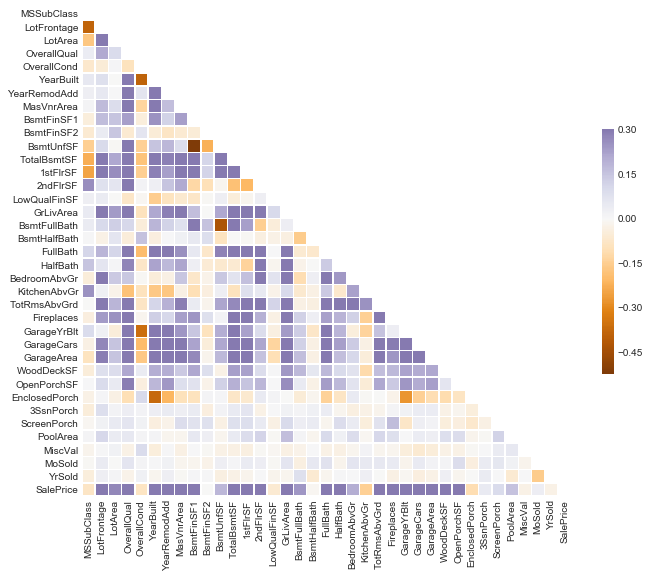

In [18]:
# Compute the correlation matrix
corr = train[numVars+list(["SalePrice"])].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

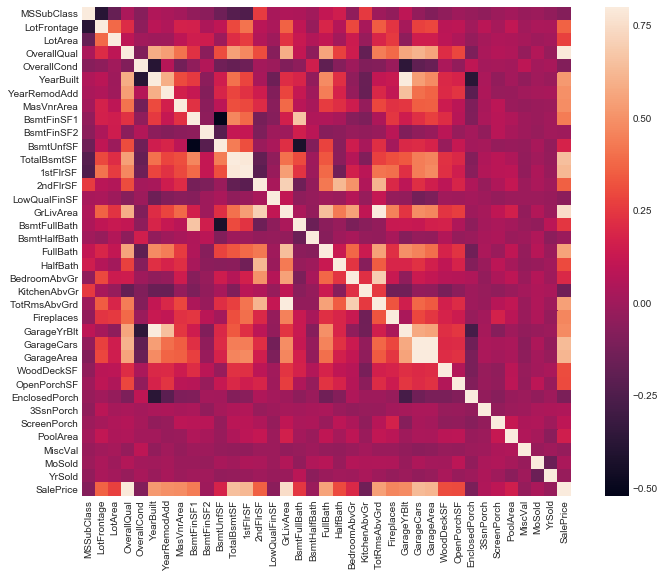

In [19]:
#correlation matrix
corrmat = train[numVars+list(['SalePrice'])].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

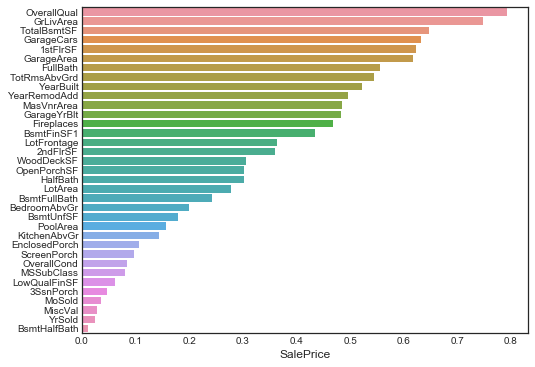

In [20]:
numTop10 = (abs(corr['SalePrice']).sort_values(ascending=False)[1:36])
#print(list(numTop10.index))

sns.barplot(y=list(numTop10.index),  x=numTop10)

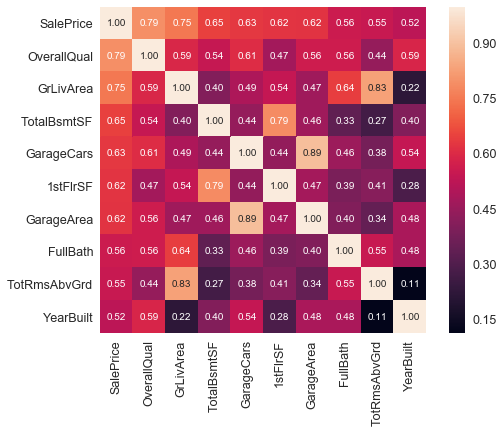

In [21]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

OverallQual     0.792814
GrLivArea       0.748350
TotalBsmtSF     0.646309
GarageCars      0.631961
1stFlrSF        0.622111
GarageArea      0.618276
FullBath        0.556400
TotRmsAbvGrd    0.545191
YearBuilt       0.522936
Name: SalePrice, dtype: float64


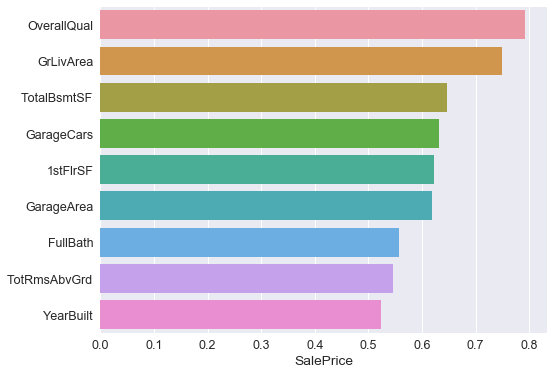

In [22]:
print(abs(corr['SalePrice']).sort_values(ascending=False)[1:10])
numTop10 = (abs(corr['SalePrice']).sort_values(ascending=False)[1:10])
#print(list(numTop10.index))

sns.barplot(y=list(numTop10.index),  x=numTop10)

In [23]:
corr2 = train[numTop10.index].corr()
#for i in range(1,len(numTop10)+1):
#        print (abs(cm[numTop10.index[i]]).sort_values(ascending=False)[1])

print(corr2>0.6)

for i in range(0,len(corr2)):
    print (corr2[numTop10.index[i]]).sort_values(ascending=False)[1]

              OverallQual  GrLivArea  TotalBsmtSF  GarageCars  1stFlrSF  \
OverallQual          True      False        False        True     False   
GrLivArea           False       True        False       False     False   
TotalBsmtSF         False      False         True       False      True   
GarageCars           True      False        False        True     False   
1stFlrSF            False      False         True       False      True   
GarageArea          False      False        False        True     False   
FullBath            False       True        False       False     False   
TotRmsAbvGrd        False       True        False       False     False   
YearBuilt           False      False        False       False     False   

              GarageArea  FullBath  TotRmsAbvGrd  YearBuilt  
OverallQual        False     False         False      False  
GrLivArea          False      True          True      False  
TotalBsmtSF        False     False         False      False  
G

OverallQual: max corr = 0.59 (include)

GrLivArea: Correlated with FullBath (0.64) and TotRmsAbvGrd (0.83); remove TotRmsAbvGrd

TotalBsmtSF: correlated with 1stFlrSF (0.79); remove 1stFlrSF

GarageCars: correlated with GarageArea (0.89); remove GarageArea

FullBath: max corr = 0.64

YearBuilt: max corr = 0.57

In [24]:
numSelect = list(numTop10.index)
numSelect.remove('TotRmsAbvGrd')
numSelect.remove('1stFlrSF')
numSelect.remove('GarageArea')

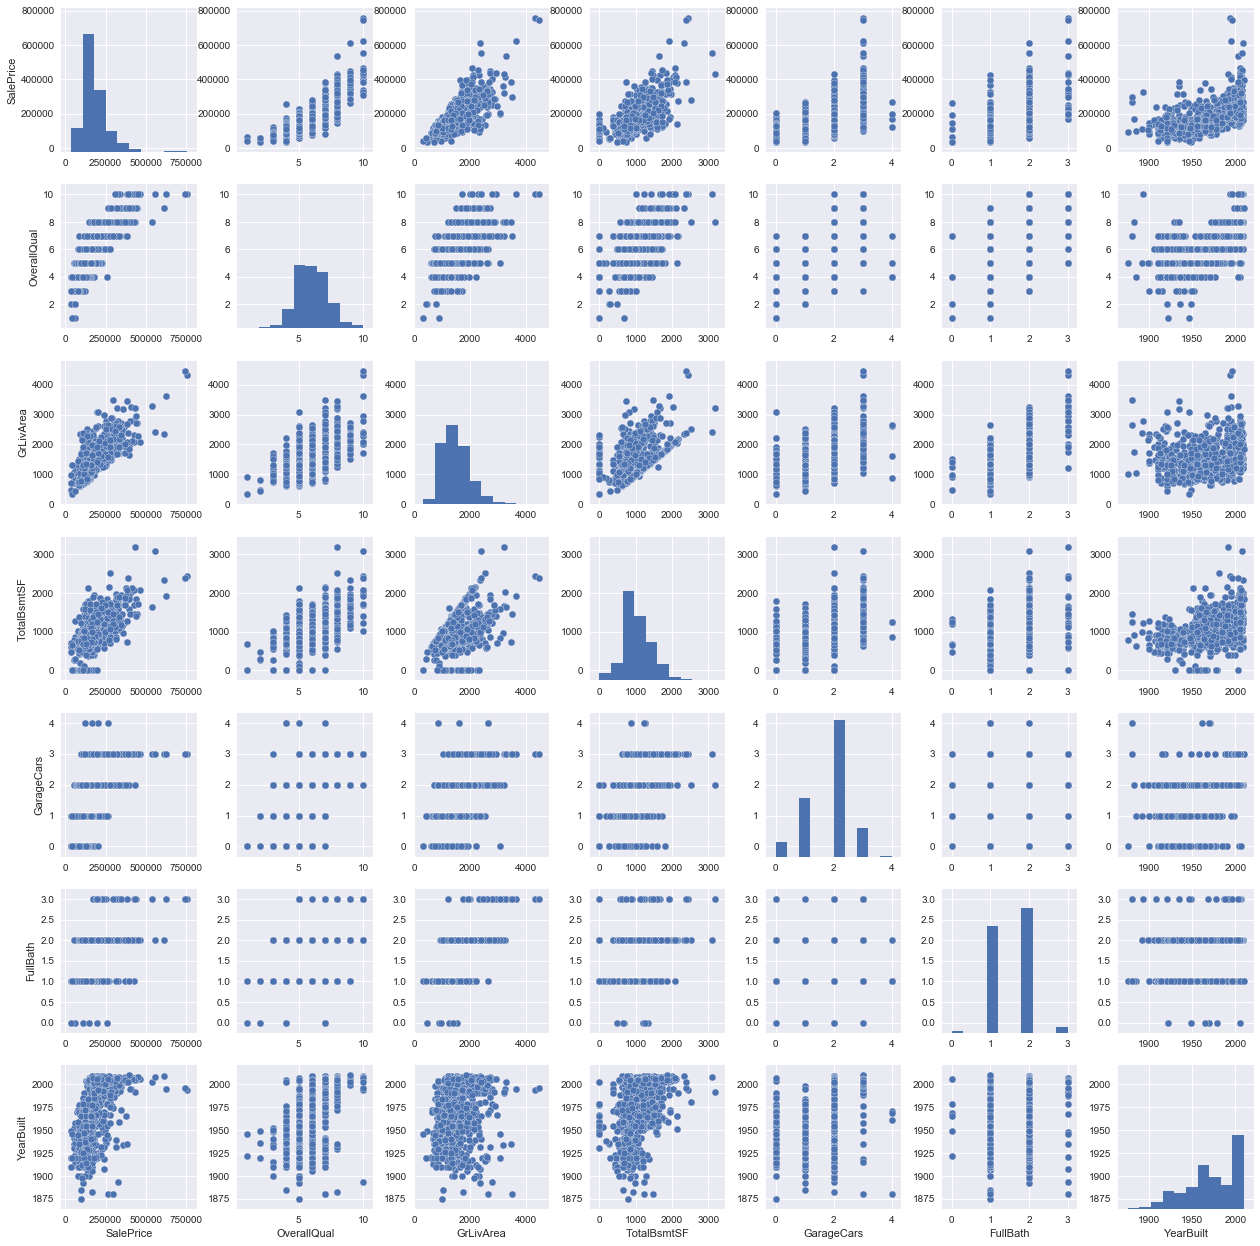

In [25]:
#scatterplot
sns.set()
#numVars_sub = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'TotalBsmtSF', 'YearBuilt']
#sns.pairplot(train[numVars_sub], size = 2.5)
sns.pairplot(train[list(['SalePrice'])+numSelect], size = 2.5)
plt.show();

#### Categorical Data

In [26]:
catData.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1021,1021,54,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1015,1021,1021,1021,994,994,993,994,994,1021,1021,1021,1021,1021,1021,532,961,961,961,961,1021,3,206,36,1021,1021
unique,5,2,2,4,4,2,5,3,25,9,6,5,8,6,6,15,15,4,4,5,6,4,4,4,6,6,5,5,2,4,4,7,5,6,3,5,5,3,3,4,4,8,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,816,1018,30,661,915,1020,735,960,161,877,1012,846,512,800,1003,367,360,597,625,903,455,455,919,658,299,868,1000,533,952,937,504,948,270,622,412,922,927,946,1,115,32,888,837


In [27]:
for c in list(catData.columns.values):
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python27\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\python27\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

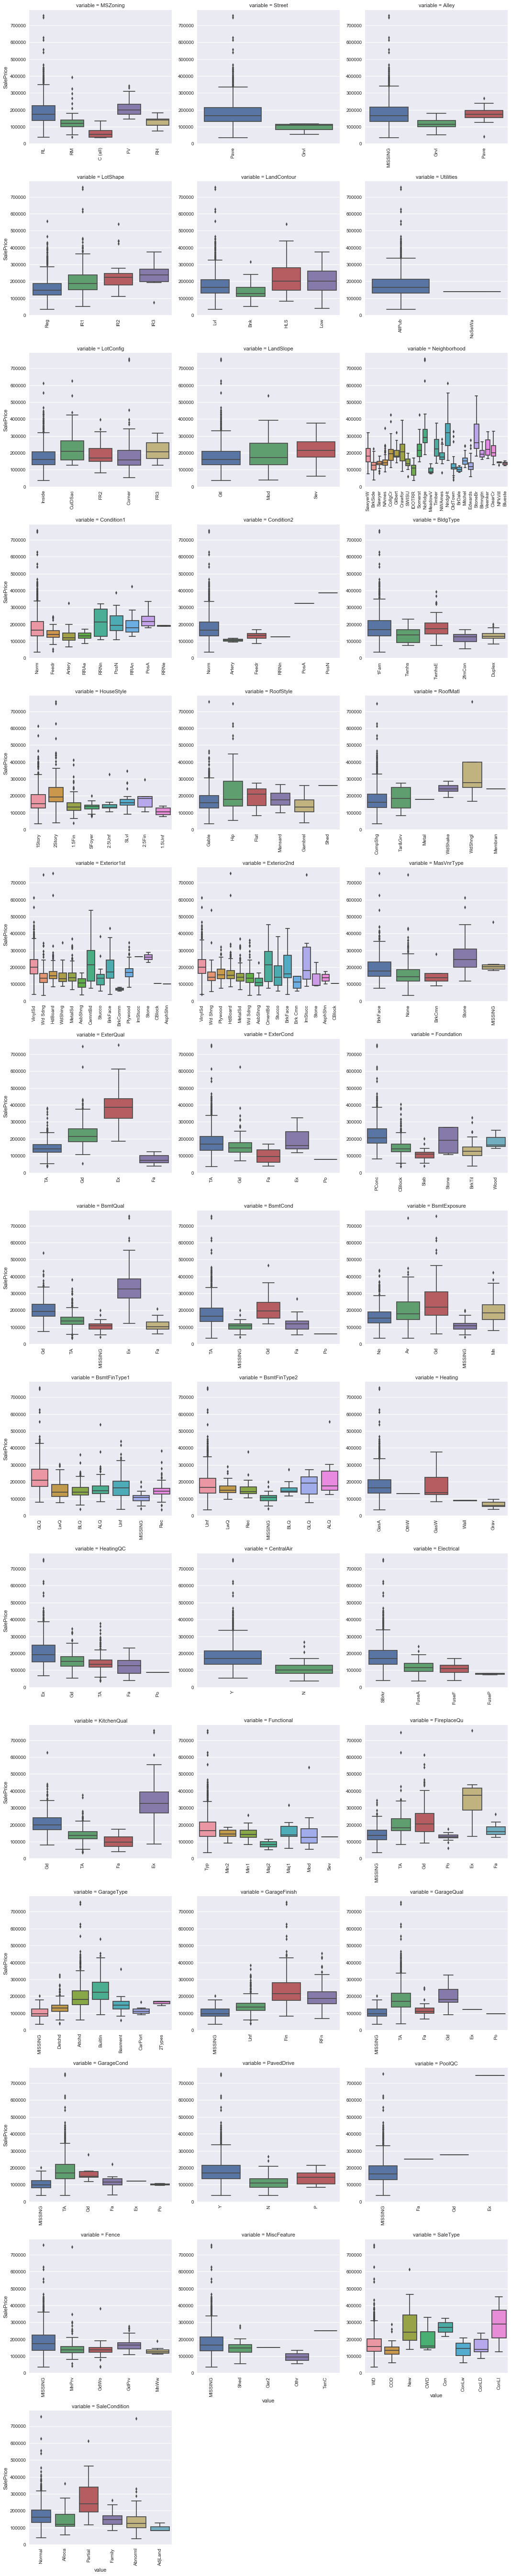

In [28]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=list(catData.columns.values))
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

Important-looking variables:

Plot variable importance (ANOVA)

Here is quick estimation of influence of categorical variable on SalePrice. For each variable SalePrices are partitioned to distinct sets based on category values. Then check with ANOVA test if sets have similar distributions. If variable has minor impact then set means should be equal. Decreasing pval is sign of increasing diversity in partitions.

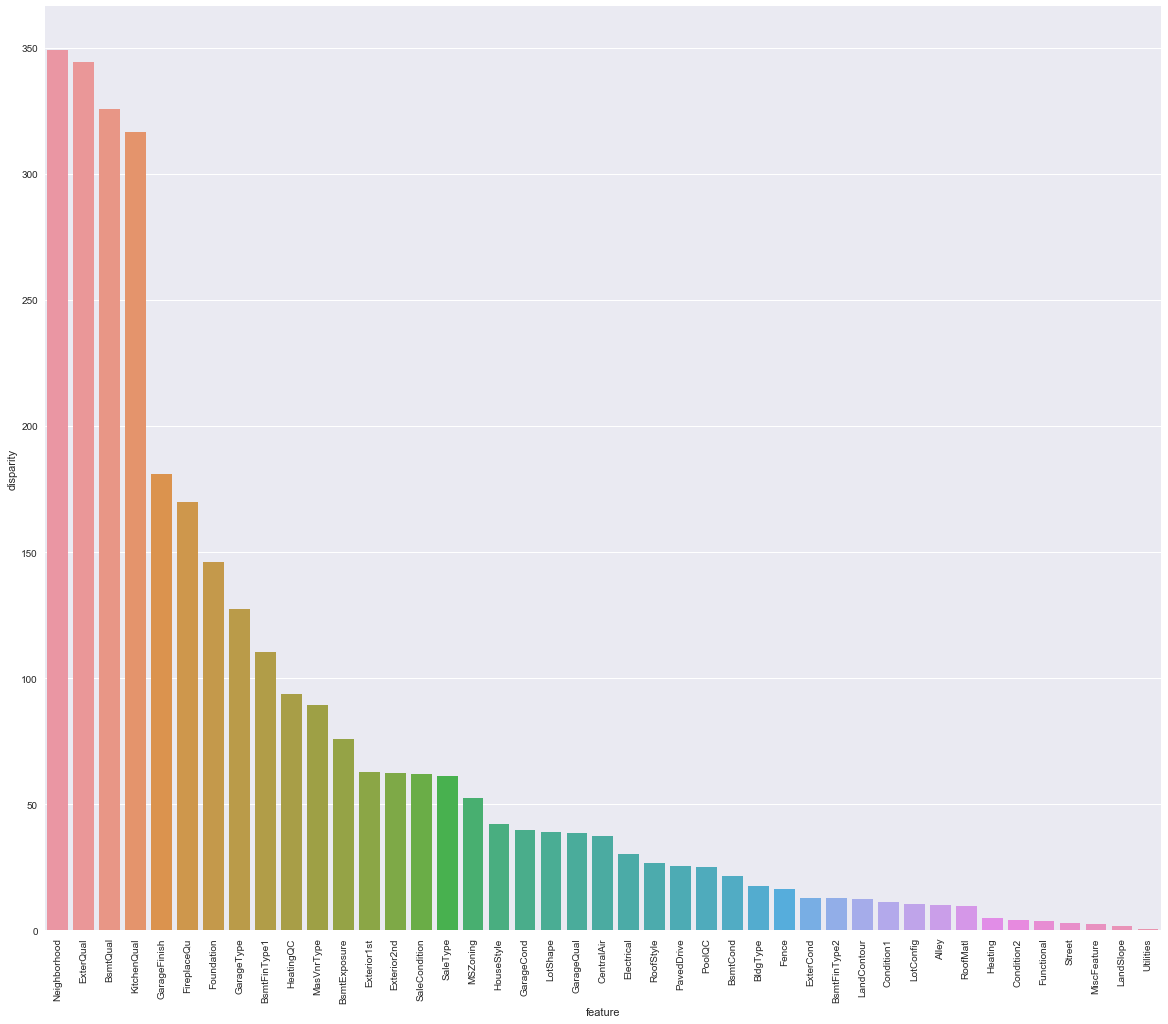

In [29]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = list(catData.columns.values)
    pvals = []
    for c in list(catData.columns.values):
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
fig, ax = plt.subplots(figsize=(20,17))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [117]:
a_sub = a[a['disparity']>90]
print(a_sub)

         feature           pval   disparity
8   Neighborhood  2.647551e-152  349.019299
18     ExterQual  3.063426e-150  344.268230
21      BsmtQual  3.972388e-142  325.587716
30   KitchenQual  2.758615e-138  316.742014
34  GarageFinish   2.221802e-79  181.105904
32   FireplaceQu   1.664127e-74  169.881996
20    Foundation   3.184198e-64  146.207246
33    GarageType   4.237381e-56  127.500820
24  BsmtFinType1   1.007175e-48  110.516936
27     HeatingQC   1.857887e-41   93.786549


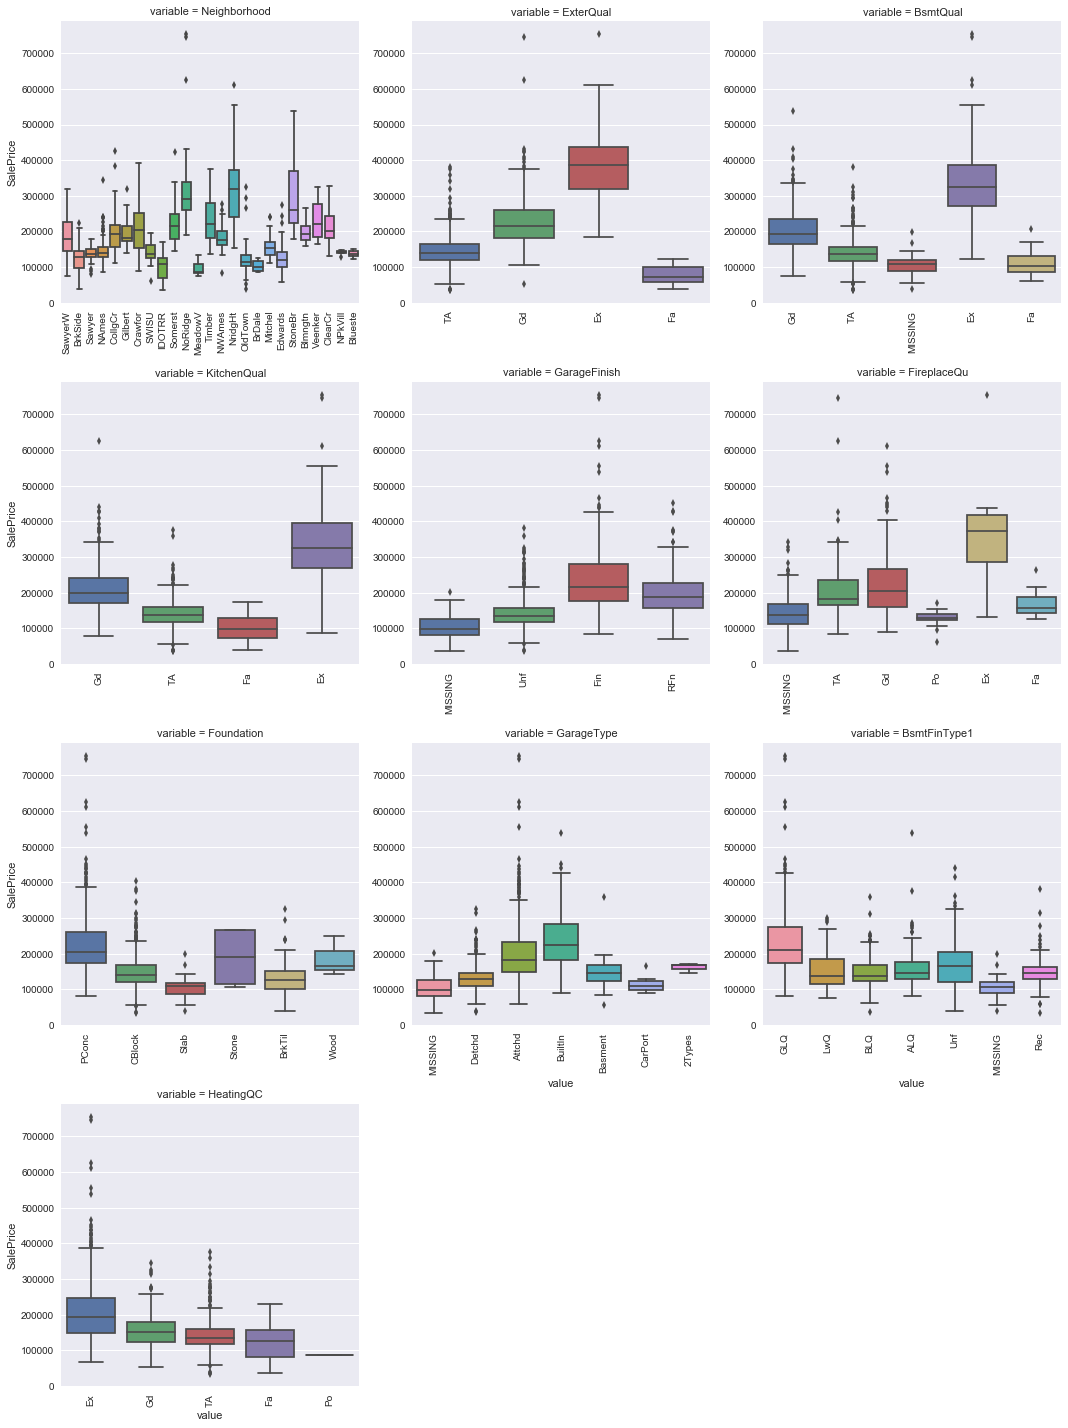

In [31]:
cat_sub = train[list(a_sub['feature'])+list(['SalePrice'])]
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(cat_sub, id_vars=['SalePrice'], value_vars=list(a_sub['feature']))
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [32]:
quality_vars = list(['ExterQual', 'KitchenQual', 'BsmtQual', 'FireplaceQu', 'HeatingQC'])
for i in quality_vars:
    cat_pivot = train.pivot_table(index=i,values="SalePrice",aggfunc=np.median)
    print (cat_pivot)

           SalePrice
ExterQual           
Ex            385625
Fa             71750
Gd            215000
TA            139400
             SalePrice
KitchenQual           
Ex              325000
Fa               97000
Gd              199900
TA              137500
          SalePrice
BsmtQual           
Ex           325812
Fa           102000
Gd           192320
TA           136000
MISSING      107500
             SalePrice
FireplaceQu           
Ex            373125.0
Fa            158000.0
Gd            203832.5
Po            129000.0
TA            182900.0
MISSING       136500.0
           SalePrice
HeatingQC           
Ex            192500
Fa            125500
Gd            150875
Po             87000
TA            135000


(5) Ex - Excellent

(4) Gd - Good

(3) TA - Average/Typical

(2) Fa - Fair

(1) Po - Poor

(NA) Missing

In [33]:
enumList = list()
for i in range(0,len(train)):
    if (train['ExterQual'].iloc[i]=='Ex'):
        enumList.append(5)
    if (train['ExterQual'].iloc[i]=='Gd'):
        enumList.append(4)
    if (train['ExterQual'].iloc[i]=='TA'):
        enumList.append(3)
    if (train['ExterQual'].iloc[i]=='Fa'):
        enumList.append(2)
    if (train['ExterQual'].iloc[i]=='Po'):
        enumList.append(1)
    if (train['ExterQual'].iloc[i]=='MISSING'):
        enumList.append(np.nan)
        
print(np.unique(enumList, return_counts=True))
print(np.unique(train['ExterQual'], return_counts=True))

#train['BsmtQual'][pd.isnull(train['BsmtQual'])]='MISSING'
#train['FireplaceQu'][pd.isnull(train['FireplaceQu'])]='MISSING'

for j in quality_vars:
    enumList = list()
    for i in range(0,len(train)):
        if (train[j].iloc[i]=='Ex'):
            enumList.append(5)
        if (train[j].iloc[i]=='Gd'):
            enumList.append(4)
        if (train[j].iloc[i]=='TA'):
            enumList.append(3)
        if (train[j].iloc[i]=='Fa'):
            enumList.append(2)
        if (train[j].iloc[i]=='Po'):
            enumList.append(1)
        if (train[j].iloc[i]=='MISSING'):
            enumList.append(0)
        if (train[j].iloc[i]=='nan'):
            enumList.append(0)
    train[j+'_E'] = enumList
    
    
#qual_dict={np.nan:0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
#name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond',\
#                 'HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])
#for i in name:
#malldata.head()

(array([2, 3, 4, 5]), array([ 10, 625, 354,  32], dtype=int64))
(array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object), array([ 32,  10, 354, 625], dtype=int64))


c:\python27\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
for j in list(['GarageFinish']):
    enumList = list()
    for i in range(0,len(train)):
        if (train[j].iloc[i]=='Fin'):
            enumList.append(3)
        if (train[j].iloc[i]=='RFn'):
            enumList.append(2)
        if (train[j].iloc[i]=='Unf'):
            enumList.append(1)
        if (train[j].iloc[i]=='MISSING'):
            enumList.append(0)
        if (train[j].iloc[i]=='nan'):
            enumList.append(0)
    train[j+'_E'] = enumList

c:\python27\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


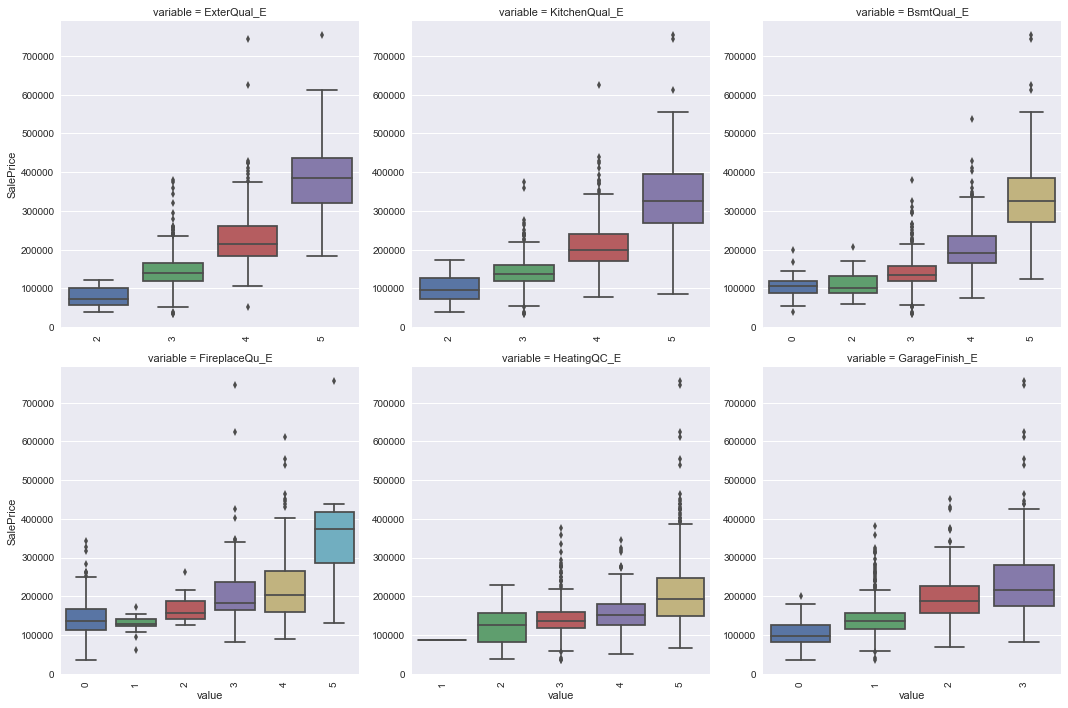

In [35]:
f = pd.melt(train, id_vars=['SalePrice'], value_vars=list(['ExterQual_E', 'KitchenQual_E', 'BsmtQual_E', 'FireplaceQu_E', 'HeatingQC_E', 'GarageFinish_E']))
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

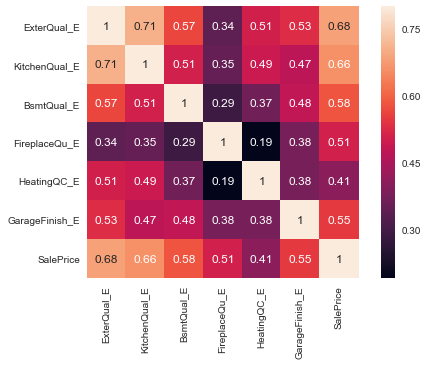

In [36]:
#correlation matrix
corrmat = train[list(['ExterQual_E', 'KitchenQual_E', 'BsmtQual_E', 'FireplaceQu_E', 'HeatingQC_E', 'GarageFinish_E'])+list(['SalePrice'])].corr()
f, ax = plt.subplots(figsize=(8, 5))
hm = sns.heatmap(corrmat, vmax=.8, square=True, annot=True);
plt.show()

In [37]:
#corr2 = train[numTop10.index].corr()
print(corrmat>0.6)

                ExterQual_E  KitchenQual_E  BsmtQual_E  FireplaceQu_E  \
ExterQual_E            True           True       False          False   
KitchenQual_E          True           True       False          False   
BsmtQual_E            False          False        True          False   
FireplaceQu_E         False          False       False           True   
HeatingQC_E           False          False       False          False   
GarageFinish_E        False          False       False          False   
SalePrice              True           True       False          False   

                HeatingQC_E  GarageFinish_E  SalePrice  
ExterQual_E           False           False       True  
KitchenQual_E         False           False       True  
BsmtQual_E            False           False      False  
FireplaceQu_E         False           False      False  
HeatingQC_E            True           False      False  
GarageFinish_E        False            True      False  
SalePrice       

Discard Kitchen Quality.

In [38]:
for i in list(['Neighborhood', 'Foundation', 'GarageType', 'BsmtFinType1', 'MasVnrType']):
    cat_pivot = train.pivot_table(index=i,values="SalePrice",aggfunc=np.median)
    print (cat_pivot)

              SalePrice
Neighborhood           
Blmngtn          191750
Blueste          137500
BrDale           100250
BrkSide          128000
ClearCr          200250
CollgCr          194000
Crawfor          205500
Edwards          119000
Gilbert          181000
IDOTRR           110000
MeadowV           86000
Mitchel          153500
NAmes            140000
NPkVill          143750
NWAmes           176000
NoRidge          290000
NridgHt          318000
OldTown          113502
SWISU            136200
Sawyer           137000
SawyerW          179900
Somerst          215200
StoneBr          260000
Timber           221450
Veenker          219750
            SalePrice
Foundation           
BrkTil       126250.0
CBlock       140000.0
PConc        204950.0
Slab         109900.0
Stone        190989.5
Wood         164000.0
            SalePrice
GarageType           
2Types       168000.0
Attchd       181950.0
Basment      146250.0
BuiltIn      223750.0
CarPort      109479.5
Detchd       129500.0


In [47]:
varFinal = numSelect + list(['ExterQual_E', 'KitchenQual_E', 'BsmtQual_E', 'GarageFinish_E']) + list(['Neighborhood'])
trainF = train[varFinal + list(['SalePrice'])]
trainF.describe()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt,ExterQual_E,KitchenQual_E,BsmtQual_E,GarageFinish_E,SalePrice
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,6.088149,1500.682664,1041.706170,1.766895,1.564153,1971.630754,3.399608,3.515181,3.479922,1.728697,180316.541626
std,1.378429,515.014060,407.993546,0.749196,0.552222,29.664427,0.567899,0.657546,0.874944,0.903072,79629.881143
min,1.000000,334.000000,0.000000,0.000000,0.000000,1875.000000,2.000000,2.000000,0.000000,0.000000,34900.000000
25%,5.000000,1128.000000,784.000000,1.000000,1.000000,1954.000000,3.000000,3.000000,3.000000,1.000000,130000.000000
50%,6.000000,1442.000000,983.000000,2.000000,2.000000,1972.000000,3.000000,3.000000,4.000000,2.000000,163000.000000
75%,7.000000,1756.000000,1286.000000,2.000000,2.000000,2000.000000,4.000000,4.000000,4.000000,2.000000,212900.000000
max,10.000000,4476.000000,3200.000000,4.000000,3.000000,2010.000000,5.000000,5.000000,5.000000,3.000000,755000.000000


#### Keep Neighborhood - turn into dummies

In [48]:
one_hot = pd.get_dummies(trainF['Neighborhood'])
trainF = trainF.drop('Neighborhood', axis=1)
trainF = trainF.join(one_hot)
trainF.describe()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt,ExterQual_E,KitchenQual_E,BsmtQual_E,GarageFinish_E,SalePrice,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,6.088149,1500.682664,1041.706170,1.766895,1.564153,1971.630754,3.399608,3.515181,3.479922,1.728697,180316.541626,0.013712,0.001959,0.009794,0.039177,0.021548,0.101861,0.035260,0.069540,0.054848,0.024486,0.010774,0.034280,0.157689,0.004897,0.044074,0.032321,0.053869,0.072478,0.015671,0.049951,0.046033,0.057786,0.014691,0.025465,0.007835
std,1.378429,515.014060,407.993546,0.749196,0.552222,29.664427,0.567899,0.657546,0.874944,0.903072,79629.881143,0.116350,0.044237,0.098529,0.194112,0.145272,0.302614,0.184526,0.254494,0.227795,0.154627,0.103287,0.182037,0.364627,0.069842,0.205361,0.176939,0.225869,0.259405,0.124260,0.217951,0.209660,0.233454,0.120374,0.157611,0.088214
min,1.000000,334.000000,0.000000,0.000000,0.000000,1875.000000,2.000000,2.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1128.000000,784.000000,1.000000,1.000000,1954.000000,3.000000,3.000000,3.000000,1.000000,130000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1442.000000,983.000000,2.000000,2.000000,1972.000000,3.000000,3.000000,4.000000,2.000000,163000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,1756.000000,1286.000000,2.000000,2.000000,2000.000000,4.000000,4.000000,4.000000,2.000000,212900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,4476.000000,3200.000000,4.000000,3.000000,2010.000000,5.000000,5.000000,5.000000,3.000000,755000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### MISSINGS

In [59]:
print("Missings or NAs in numeric variables:")
print(" ")
num_missing = trainF.isnull().sum()
print(num_missing)

print(" ")
print("Missings or NAs in categoric variables:")
print(" ")
for i in list(['ExterQual_E', 'KitchenQual_E', 'BsmtQual_E', 'GarageFinish_E']):
    print(i + ": ")
    print((trainF[i]==0).sum())

Missings or NAs in numeric variables:
 
OverallQual       0
GrLivArea         0
TotalBsmtSF       0
GarageCars        0
FullBath          0
YearBuilt         0
ExterQual_E       0
KitchenQual_E     0
BsmtQual_E        0
GarageFinish_E    0
SalePrice         0
Blmngtn           0
Blueste           0
BrDale            0
BrkSide           0
ClearCr           0
CollgCr           0
Crawfor           0
Edwards           0
Gilbert           0
IDOTRR            0
MeadowV           0
Mitchel           0
NAmes             0
NPkVill           0
NWAmes            0
NoRidge           0
NridgHt           0
OldTown           0
SWISU             0
Sawyer            0
SawyerW           0
Somerst           0
StoneBr           0
Timber            0
Veenker           0
dtype: int64
 
Missings or NAs in categoric variables:
 
ExterQual_E: 
0
KitchenQual_E: 
0
BsmtQual_E: 
27
GarageFinish_E: 
60


Upon closer inspection, we see that the missing values (now 0's) only occur in Basement Quality and Garage Finish variables. Are these truely missing, or could it be that there are just no basements and garages for these homes?

In [60]:
train['TotalBsmtSF'][train['BsmtQual_E']==0]

1218    0
646     0
1000    0
1048    0
897     0
894     0
868     0
342     0
984     0
778     0
705     0
17      0
736     0
1049    0
259     0
182     0
39      0
102     0
371     0
90      0
553     0
1412    0
533     0
1011    0
1216    0
532     0
362     0
Name: TotalBsmtSF, dtype: int64

No basements in these homes!

In [62]:
train['GarageFinish_E'][train['GarageArea']==0]

148     0
1218    0
434     0
843     0
710     0
750     0
108     0
375     0
464     0
784     0
441     0
163     0
613     0
1449    0
738     0
165     0
1257    0
705     0
976     0
99      0
954     0
1337    0
1030    0
528     0
562     0
921     0
1123    0
1137    0
1325    0
1219    0
614     0
88      0
1326    0
582     0
287     0
1323    0
1283    0
535     0
968     0
386     0
127     0
636     0
1173    0
495     0
649     0
1407    0
39      0
638     0
960     0
1143    0
210     0
250     0
1009    0
198     0
291     0
970     0
533     0
1011    0
125     0
1096    0
Name: GarageFinish_E, dtype: int64

No garages in these homes!

Let's keep both of these missings as 0's as they line up with the trends we see in Sale Price

#### OUTLIERS

No obvious outliers seen in numeric variables pairplots above. Otherwise, would remove individual rows containing outliers.

#### NORMALIZATION OF SKEWED

In [ ]:
## Standardizing numeric features
numeric_features = features.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

ax = sns.pairplot(numeric_features_standardized)

In [ ]:
log

In [ ]:
#    from scipy.stats import skew 
#    skewness = train_num.apply(lambda x: skew(x))
#   skewness.sort_values(ascending=False)

#    skewness = skewness[abs(skewness)>0.5]
#    skewness.index

#    skew_features = train[skewness.index]
#    skew_features.columns

#    #we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.
#    skew_features = np.log1p(skew_features)

## MODELING

In [ ]:
import copy
X_train_rare = copy.copy(X_train)
X_test_rare = copy.copy(X_test)
X_train_rare["test"]=0
X_test_rare["test"]=1
temp_df = pandas.concat([X_train_rare,X_test_rare],axis=0)
names = list(X_train_rare.columns.values)
temp_df = pandas.concat([X_train_rare,X_test_rare],axis=0)
for i in names:
    temp_df.loc[temp_df[i].value_counts()[temp_df[i]].values < 20, i] = "RARE_VALUE"
for i in range(temp_df.shape[1]):
    temp_df.iloc[:,i]=temp_df.iloc[:,i].astype('str')
X_train_rare = temp_df[temp_df["test"]=="0"].iloc[:,:-1].values
X_test_rare = temp_df[temp_df["test"]=="1"].iloc[:,:-1].values
for i in range(X_train_rare.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(temp_df.iloc[:,:-1].iloc[:, i])
    les.append(le)
    X_train_rare[:, i] = le.transform(X_train_rare[:, i])
    X_test_rare[:, i] = le.transform(X_test_rare[:, i])
enc.fit(X_train_rare)
X_train_rare = enc.transform(X_train_rare)
X_test_rare = enc.transform(X_test_rare)
l.fit(X_train_rare,y_train)
y_pred = l.predict_proba(X_test_rare)
print(log_loss(y_test,y_pred))
r.fit(X_train_rare,y_train)
y_pred = r.predict_proba(X_test_rare)
print(log_loss(y_test,y_pred))
print(X_train_rare.shape)

XGBoost, Ridge, Lasso and Elastic-Net regularization
https://www.kaggle.com/tannercarbonati/detailed-data-analysis-ensemble-modeling

### Lasso Model

In [ ]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

def log_transform(feature):
    train[feature] = np.log1p(train[feature].values)

def quadratic(feature):
    train[feature+'2'] = train[feature]**2
    
log_transform('GrLivArea')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')

quadratic('OverallQual')
quadratic('YearBuilt')
quadratic('YearRemodAdd')
quadratic('TotalBsmtSF')
quadratic('2ndFlrSF')
quadratic('Neighborhood_E')
quadratic('RoofMatl_E')
quadratic('GrLivArea')

qdr = ['OverallQual2', 'YearBuilt2', 'YearRemodAdd2', 'TotalBsmtSF2',
        '2ndFlrSF2', 'Neighborhood_E2', 'RoofMatl_E2', 'GrLivArea2']

train['HasBasement'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasGarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['Has2ndFloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasMasVnr'] = train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
train['HasWoodDeck'] = train['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPorch'] = train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['IsNew'] = train['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

boolean = ['HasBasement', 'HasGarage', 'Has2ndFloor', 'HasMasVnr', 'HasWoodDeck',
            'HasPorch', 'HasPool', 'IsNew']


features = quantitative + qual_encoded + boolean + qdr
lasso = linear_model.LassoLarsCV(max_iter=10000)
X = train[features].fillna(0.).values
Y = train['SalePrice'].values
lasso.fit(X, np.log(Y))

Ypred = np.exp(lasso.predict(X))
error(Y, Ypred)

Can also use lasso or ridge regression as wrapper filter methods for best feature selection

In [ ]:
import patsy

Y, X = patsy.dmatrices(
    "SalePrice ~ \
        GarageCars + \
        np.log1p(BsmtFinSF1) + \
        ScreenPorch + \
        Condition1_E + \
        Condition2_E + \
        WoodDeckSF + \
        np.log1p(LotArea) + \
        Foundation_E + \
        MSZoning_E + \
        MasVnrType_E + \
        HouseStyle_E + \
        Fireplaces + \
        CentralAir_E + \
        BsmtFullBath + \
        EnclosedPorch + \
        PavedDrive_E + \
        ExterQual_E + \
        bs(OverallCond, df=7, degree=1) + \
        bs(MSSubClass, df=7, degree=1) + \
        bs(LotArea, df=2, degree=1) + \
        bs(FullBath, df=3, degree=1) + \
        bs(HalfBath, df=2, degree=1) + \
        bs(BsmtFullBath, df=3, degree=1) + \
        bs(TotRmsAbvGrd, df=2, degree=1) + \
        bs(LandSlope_E, df=2, degree=1) + \
        bs(LotConfig_E, df=2, degree=1) + \
        bs(SaleCondition_E, df=3, degree=1) + \
        OverallQual + np.square(OverallQual) + \
        GrLivArea + np.square(GrLivArea) + \
        Q('1stFlrSF') + np.square(Q('1stFlrSF')) + \
        Q('2ndFlrSF') + np.square(Q('2ndFlrSF')) +  \
        TotalBsmtSF + np.square(TotalBsmtSF) +  \
        KitchenAbvGr + np.square(KitchenAbvGr) +  \
        YearBuilt + np.square(YearBuilt) + \
        Neighborhood_E + np.square(Neighborhood_E) + \
        Neighborhood_E:OverallQual + \
        MSSubClass:BldgType_E + \
        ExterQual_E:OverallQual + \
        PoolArea:PoolQC_E + \
        Fireplaces:FireplaceQu_E + \
        OverallQual:KitchenQual_E + \
        GarageQual_E:GarageCond + \
        GarageArea:GarageCars + \
        Q('1stFlrSF'):TotalBsmtSF + \
        TotRmsAbvGrd:GrLivArea",
    train.to_dict('list'))

ridge = linear_model.RidgeCV(cv=10)
ridge.fit(X, np.log(Y))
Ypred = np.exp(ridge.predict(X))
print(error(Y,Ypred))

In [ ]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)